<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/70_EffB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.efficientnet import EfficientNetB7, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm, metrics
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/DR_50_70/Train_70'
test_dir = '/content/drive/MyDrive/DR_50_70/Test_70'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load VGG16 model for feature extraction
model = EfficientNetB7(weights='imagenet', include_top=False)

258076736/258076736 [==============================] - 10s 0us/step


In [4]:
# Function to extract features from an image
def extract_features_B7net(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [5]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_B7net(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 1s 858ms/step


In [6]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_B7net(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 1s 1s/step


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# Perform feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a linear SVM classifier
svm = SVC(kernel='linear')

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=7, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the SVM classifier with the best parameters
best_svm = SVC(kernel='linear', C=best_params['C'])
best_svm.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm.predict(x_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns

# Perform feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.001, 0.01]}

# Create a linear SVM classifier
svm = SVC(kernel='linear')

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the SVM classifier with the best parameters
best_svm = SVC(kernel='linear', C=best_params['C'])
best_svm.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm.predict(x_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute TP, TN, FP, FN for each class
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
# Determine the number of classes
num_classes = len(np.unique(y_train))  # Assuming y_train contains the labels for all classes

TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)   # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))

# Compute overall TP, TN, FP, FN
overall_TP = np.sum(TP)
overall_TN = np.sum(TN)
overall_FP = np.sum(FP)
overall_FN = np.sum(FN)

# Compute accuracy and specificity
accuracy = (overall_TP + overall_TN) / (overall_TP + overall_TN + overall_FP + overall_FN)
specificity = overall_TN / (overall_TN + overall_FP)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print performance metrics
print("True Positives:", overall_TP)
print("True Negatives:", overall_TN)
print("False Positives:", overall_FP)
print("False Negatives:", overall_FN)
print("Accuracy:", accuracy)
print("Specificity:", specificity)


In [ ]:
from PIL import Image, ImageFilter
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Determine the number of classes
num_classes = len(np.unique(y_train))  # Assuming y_train contains the labels for all classes

# Function to preprocess image and extract edges
def preprocess_image(image_path, edge_detection_threshold):
    print("Image path:", image_path)  # Print the image path
    # Open image
    image = Image.open(image_path)

    # Convert image to grayscale
    image_gray = image.convert('L')

    # Apply edge detection filter
    edges = image_gray.filter(ImageFilter.FIND_EDGES)

    # Threshold edge detection
    edges = np.array(edges)
    edges[edges <= edge_detection_threshold] = 0
    edges[edges > edge_detection_threshold] = 255

    # Convert NumPy array back to image object
    edges_image = Image.fromarray(edges.astype(np.uint8))

    return edges_image

# Define custom kernel function
def custom_kernel(X, Y, edge_detection_threshold):
    # Preprocess images and extract edges
    edges_X = [preprocess_image(image_path, edge_detection_threshold) for image_path in X]
    edges_Y = [preprocess_image(image_path, edge_detection_threshold) for image_path in Y]

    # Compute similarity measure based on edges (e.g., sum of absolute differences)
    kernel_matrix = np.zeros((len(X), len(Y)))
    for i, edge_X in enumerate(edges_X):
        for j, edge_Y in enumerate(edges_Y):
            kernel_matrix[i, j] = np.sum(np.abs(np.array(edge_X) - np.array(edge_Y)))

    return kernel_matrix

# Function to compute performance metrics
def compute_performance_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = np.diag(cm).sum() / cm.sum()
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])

    return accuracy, precision, recall, f1, specificity, cm

# Plot confusion matrix
def plot_confusion_matrix(cm, num_classes, custom_kernel_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {custom_kernel_name} custom_kernel')
    plt.show()

# Data directories
train_dir = '/content/drive/MyDrive/DR_50/Train'
test_dir = '/content/drive/MyDrive/DR_50/Test'

# Get list of image file names
train_files = []
test_files = []

for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            image_path = os.path.join(root, file)
            print("Train image path:", image_path)  # Print the train image path
            train_files.append(image_path)

for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            image_path = os.path.join(root, file)
            print("Test image path:", image_path)  # Print the test image path
            test_files.append(image_path)

# Preprocess and extract edges for training and test images
edge_detection_threshold = 20  # Adjust as needed
X_train_edges = [preprocess_image(image_path, edge_detection_threshold) for image_path in train_files]
X_test_edges = [preprocess_image(image_path, edge_detection_threshold) for image_path in test_files]

# Flatten the images
X_train_flattened = [np.array(img).flatten() for img in X_train_edges]
X_test_flattened = [np.array(img).flatten() for img in X_test_edges]

# Train SVM classifier
svm_clf = SVC(kernel=lambda X, Y: custom_kernel(X, Y, edge_detection_threshold), gamma='auto')
svm_clf.fit(X_train_flattened, y_train)

# Predict on test set
y_pred = svm_clf.predict(X_test_flattened)

# Compute performance metrics
accuracy, precision, recall, f1, specificity, cm = compute_performance_metrics(y_test, y_pred)

# Plot confusion matrix
num_classes = ...  # Fill in the number of classes in your dataset
custom_kernel_name = "Custom Kernel"
plot_confusion_matrix(cm, num_classes, custom_kernel_name)

# Print performance metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Specificity: {specificity}')

# Classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Create SVM classifier
svm_clf = SVC()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)


In [ ]:
# Check the length of x_train (number of samples)
print("Length of x_train:", len(x_train))

# Print the first few elements of x_train
print("First few elements of x_train:", x_train[:5])

# Check the shape of x_train
print("Shape of x_train:", x_train.shape)

# Check the shape of y_train
print("Shape of y_train:", y_train.shape)

# Check the first few samples in x_train
print("First few samples in x_train:", x_train[:5])

# Check the first few samples in y_train
print("First few samples in y_train:", y_train[:5])


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns
from sklearn import svm, metrics

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining SVM with {kernel.upper()} kernel...\033[0m")

    # Train SVM classifier
    if kernel == 'polynomial_exponential':
        clf = svm.SVC(kernel='precomputed')
        # Pre-compute the kernel matrix
        gram_train = np.dot(x_train_flat, x_train_flat.T)
        clf.fit(gram_train, y_train)
        gram_test = np.dot(x_test_flat, x_train_flat.T)
    else:
        clf = svm.SVC(kernel=kernel)
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    if kernel == 'polynomial_exponential':
        y_pred = clf.predict(gram_test)
    else:
        y_pred = clf.predict(x_test_flat)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute TP, TN, FP, FN for each class
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    num_classes = cm.shape[0]
    TN = []
    for i in range(num_classes):
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))

    # Compute overall TP, TN, FP, FN
    overall_TP = np.sum(TP)
    overall_TN = np.sum(TN)
    overall_FP = np.sum(FP)
    overall_FN = np.sum(FN)

    # Compute accuracy, precision, specificity, sensitivity, F1-score, recall
    accuracy = (overall_TP + overall_TN) / (overall_TP + overall_TN + overall_FP + overall_FN)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    specificity = overall_TN / (overall_TN + overall_FP)

    # Print performance metrics
    print(f'True Positives: {overall_TP}')
    print(f'True Negatives: {overall_TN}')
    print(f'False Positives: {overall_FP}')
    print(f'False Negatives: {overall_FN}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Specificity: {specificity}')
    print(f'Sensitivity: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Recall: {recall}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()


In [ ]:
from tensorflow.keras.models import Model
# Choose a layer to extract feature maps from (e.g., the activation_49 layer)
layer_name = 'block3c_drop'
feature_extractor_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Load and preprocess an example image
img_path = '/content/drive/MyDrive/A/Train/0/10.jpg'  # Change this to your image file path
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Extract features from the example image
features = feature_extractor_model.predict(x)

# Visualize the feature maps
plt.figure(figsize=(16, 16))
num_subplots = min(64, features.shape[-1])  # Limit the number of subplots to 64 or the actual number of features
for i in range(num_subplots):
    plt.subplot(8, 8, i + 1)
    plt.imshow(features[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()

Training SVM with LINEAR kernel...
True Positives: 635
True Negatives: 2660
False Positives: 40
False Negatives: 40
Accuracy: 0.9762962962962963
Precision: 0.9420170090129455
Specificity: 0.9851851851851852
Sensitivity: 0.9407407407407407
F1 Score: 0.9410771354744798
Recall: 0.9407407407407407



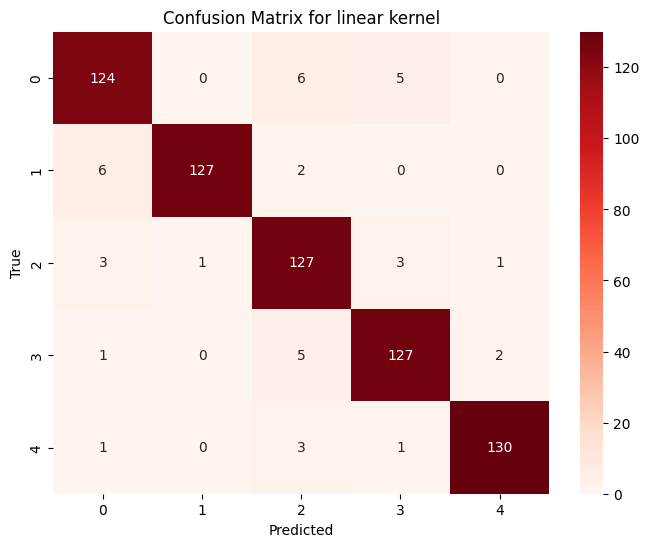

Training SVM with POLY kernel...
True Positives: 590
True Negatives: 2615
False Positives: 85
False Negatives: 85
Accuracy: 0.9496296296296296
Precision: 0.8780252477611246
Specificity: 0.9685185185185186
Sensitivity: 0.874074074074074
F1 Score: 0.8740453450516545
Recall: 0.874074074074074



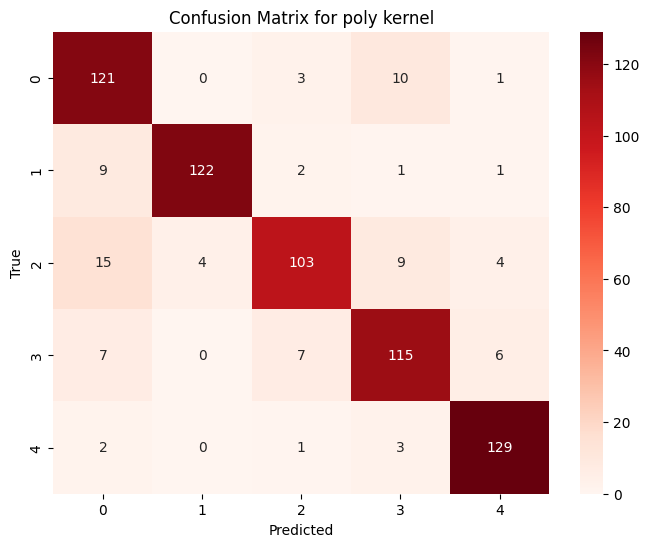

Training SVM with RBF kernel...
True Positives: 570
True Negatives: 2595
False Positives: 105
False Negatives: 105
Accuracy: 0.9377777777777778
Precision: 0.8556538452112307
Specificity: 0.9611111111111111
Sensitivity: 0.8444444444444443
F1 Score: 0.8462860007581773
Recall: 0.8444444444444443



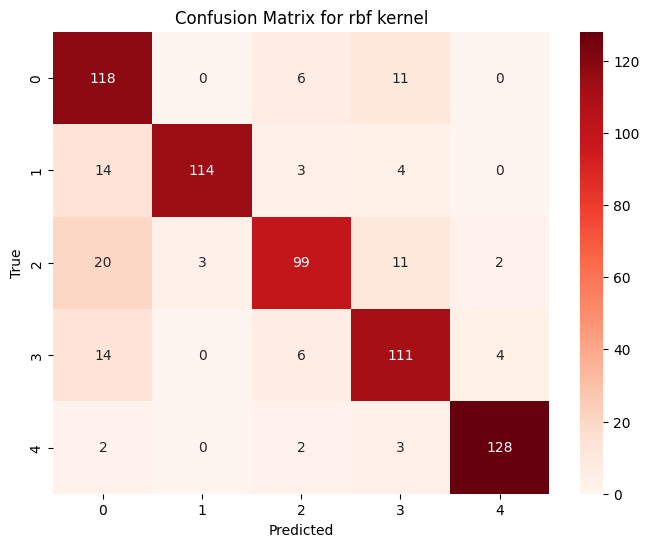

Training SVM with SIGMOID kernel...
True Positives: 501
True Negatives: 2526
False Positives: 174
False Negatives: 174
Accuracy: 0.8968888888888888
Precision: 0.7727210165980449
Specificity: 0.9355555555555556
Sensitivity: 0.7422222222222222
F1 Score: 0.7474270686495974
Recall: 0.7422222222222222



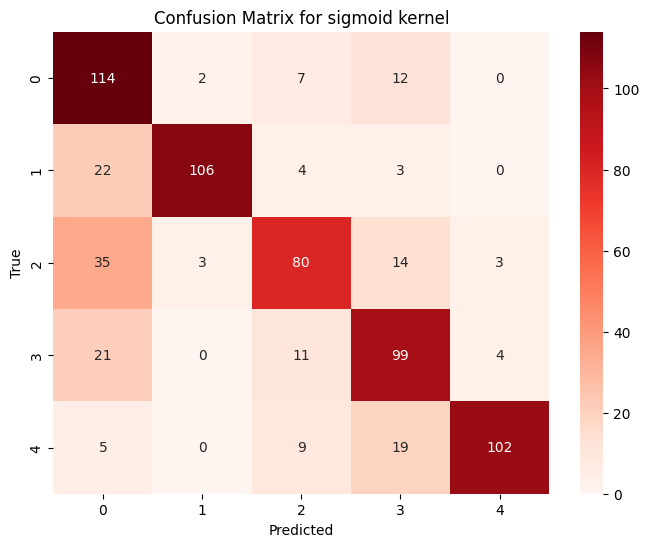

Training SVM with POLYNOMIAL_EXPONENTIAL kernel...
True Positives: 636
True Negatives: 2661
False Positives: 39
False Negatives: 39
Accuracy: 0.9768888888888889
Precision: 0.9435558514341409
Specificity: 0.9855555555555555
Sensitivity: 0.9422222222222223
F1 Score: 0.9425501409371095
Recall: 0.9422222222222223



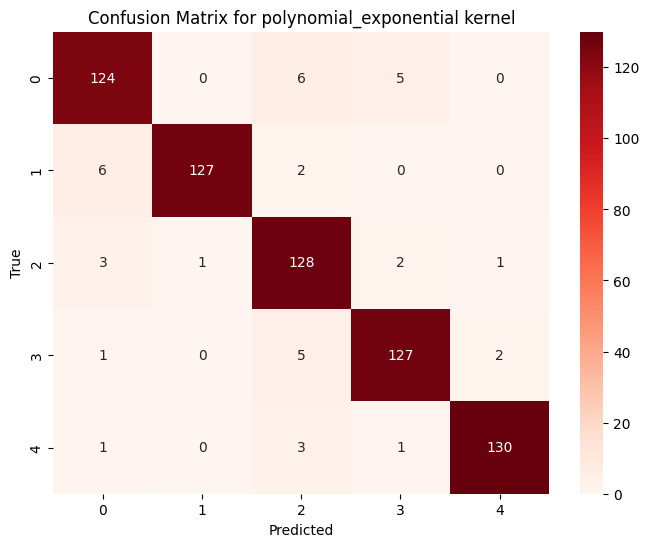

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns
from sklearn import svm, metrics

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining SVM with {kernel.upper()} kernel...\033[0m")

    # Train SVM classifier
    if kernel == 'polynomial_exponential':
        clf = svm.SVC(kernel='precomputed')
        # Pre-compute the kernel matrix
        gram_train = np.dot(x_train_flat, x_train_flat.T)
        clf.fit(gram_train, y_train)
        gram_test = np.dot(x_test_flat, x_train_flat.T)
    else:
        clf = svm.SVC(kernel=kernel)
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    if kernel == 'polynomial_exponential':
        y_pred = clf.predict(gram_test)
    else:
        y_pred = clf.predict(x_test_flat)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute TP, TN, FP, FN for each class
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    num_classes = cm.shape[0]
    TN = []
    for i in range(num_classes):
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))

    # Compute overall TP, TN, FP, FN
    overall_TP = np.sum(TP)
    overall_TN = np.sum(TN)
    overall_FP = np.sum(FP)
    overall_FN = np.sum(FN)

    # Compute accuracy, precision, specificity, sensitivity, F1-score, recall
    accuracy = (overall_TP + overall_TN) / (overall_TP + overall_TN + overall_FP + overall_FN)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    specificity = overall_TN / (overall_TN + overall_FP)

    # Print performance metrics
    print(f'True Positives: {overall_TP}')
    print(f'True Negatives: {overall_TN}')
    print(f'False Positives: {overall_FP}')
    print(f'False Negatives: {overall_FN}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Specificity: {specificity}')
    print(f'Sensitivity: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Recall: {recall}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()
